In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [49]:
data = pd.read_csv('D:\\ml\\Demo Datasets\\Lesson 8\\AirPassengers.csv', parse_dates=['Month'], index_col='Month')

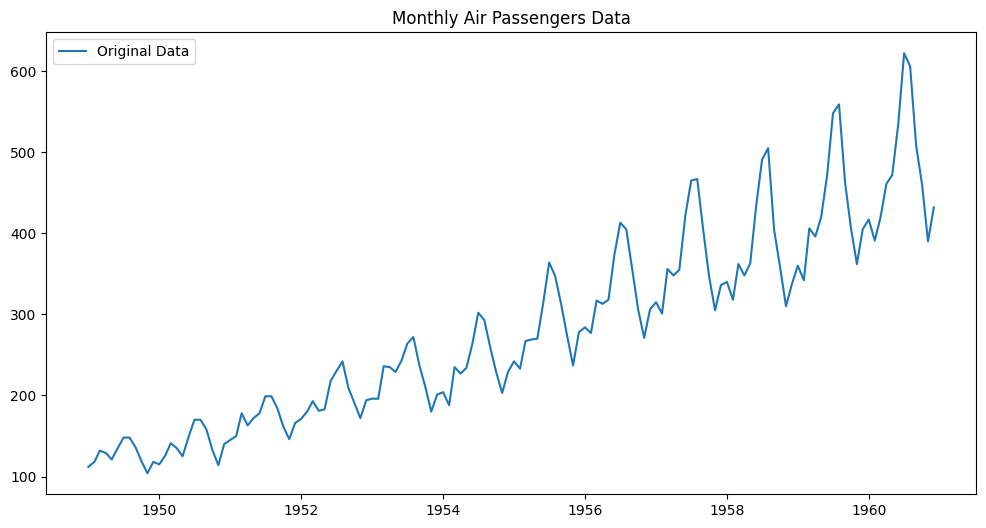

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.title('Monthly Air Passengers Data')
plt.legend()
plt.show()

In [51]:
rolling_window = 12  # 12 months for rolling statistics (one year)
rolmean = data.rolling(window=rolling_window).mean()
rolstd = data.rolling(window=rolling_window).std()

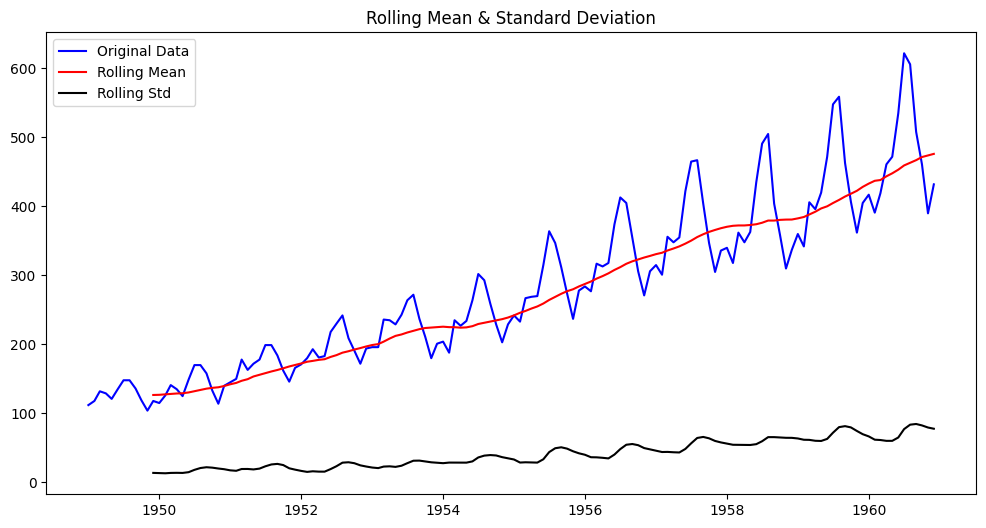

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(data, color='blue', label='Original Data')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [53]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [54]:
if dftest[1] > 0.05:  # p-value > 0.05 indicates non-stationarity
    data_diff = data.diff().dropna()

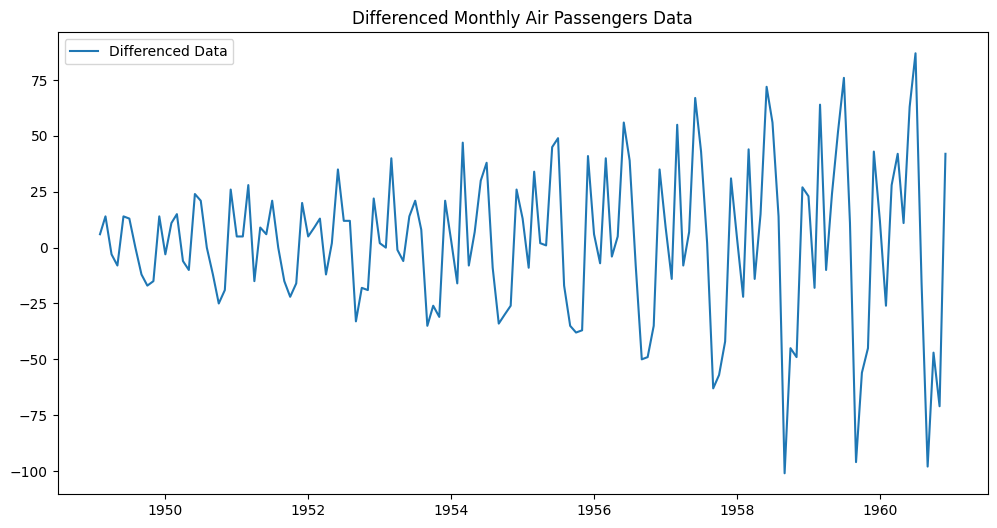

In [55]:
    plt.figure(figsize=(12, 6))
    plt.plot(data_diff, label='Differenced Data')
    plt.title('Differenced Monthly Air Passengers Data')
    plt.legend()
    plt.show()

In [56]:
rolmean_diff = data_diff.rolling(window=rolling_window).mean()
rolstd_diff = data_diff.rolling(window=rolling_window).std()

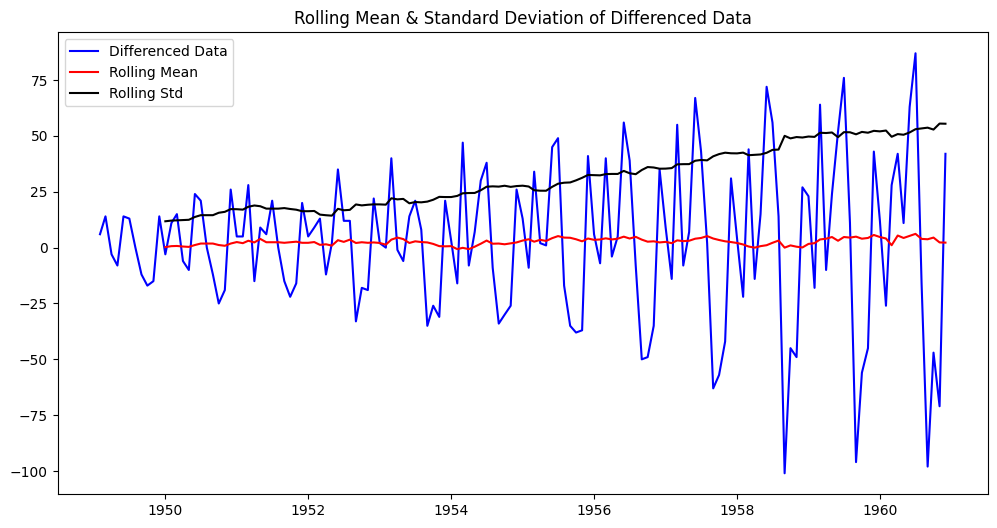

In [57]:
    plt.figure(figsize=(12, 6))
    plt.plot(data_diff, color='blue', label='Differenced Data')
    plt.plot(rolmean_diff, color='red', label='Rolling Mean')
    plt.plot(rolstd_diff, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation of Differenced Data')
    plt.show()

In [58]:
print('Results of Dickey-Fuller Test on Differenced Data:')
dftest_diff = adfuller(data_diff['#Passengers'], autolag='AIC')

dfoutput_diff = pd.Series(dftest_diff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest_diff[4].items():
    dfoutput_diff['Critical Value (%s)' % key] = value

    print(dfoutput_diff)
else:
    print("The time series is already stationary.")

Results of Dickey-Fuller Test on Differenced Data:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
dtype: float64
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
The time series is already stationary.


Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
dtype: float64


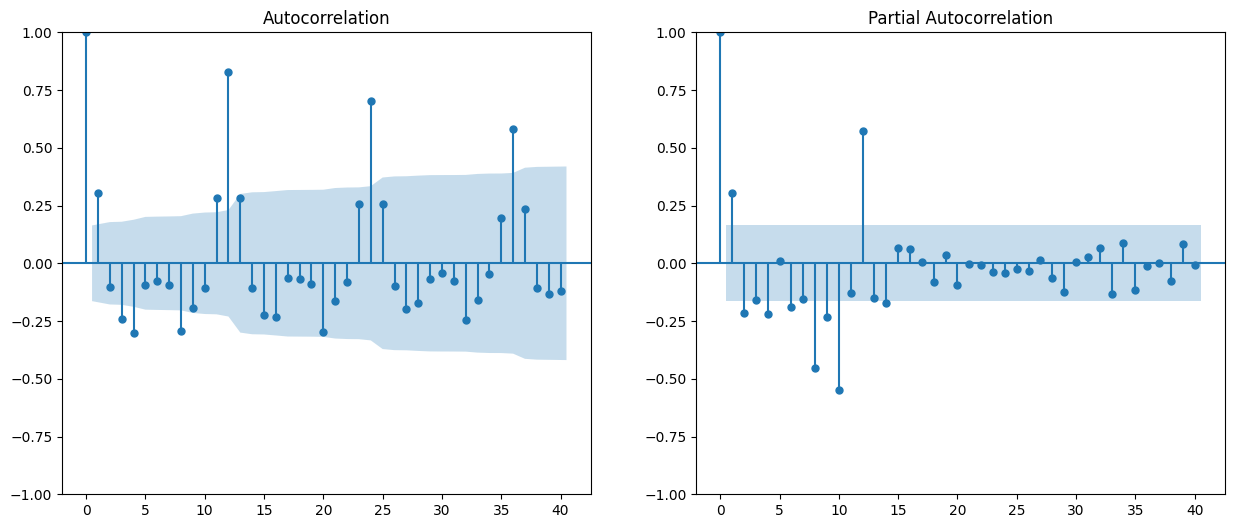

Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64


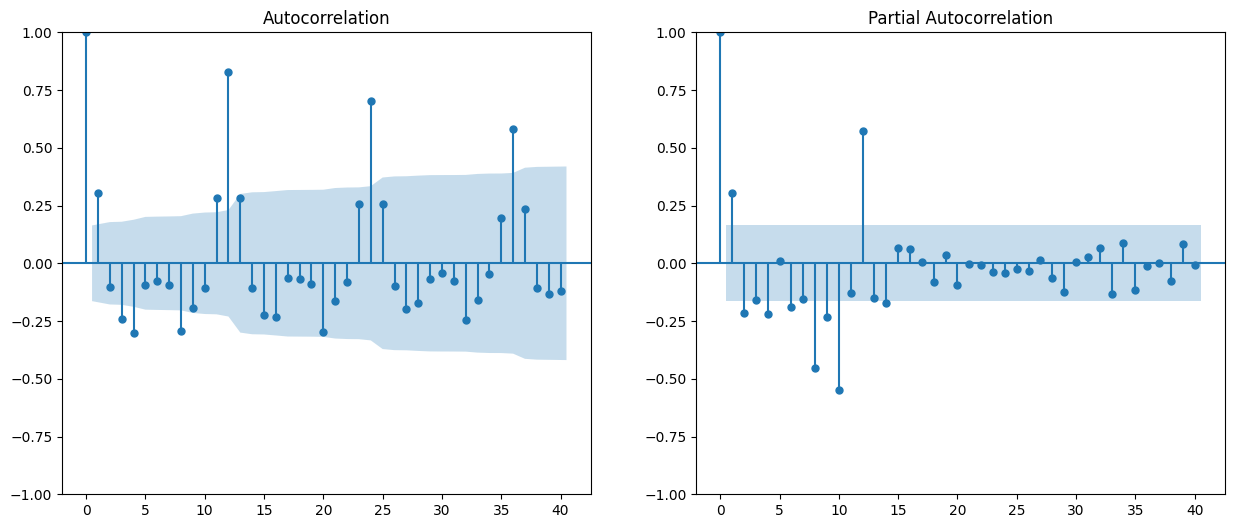

Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


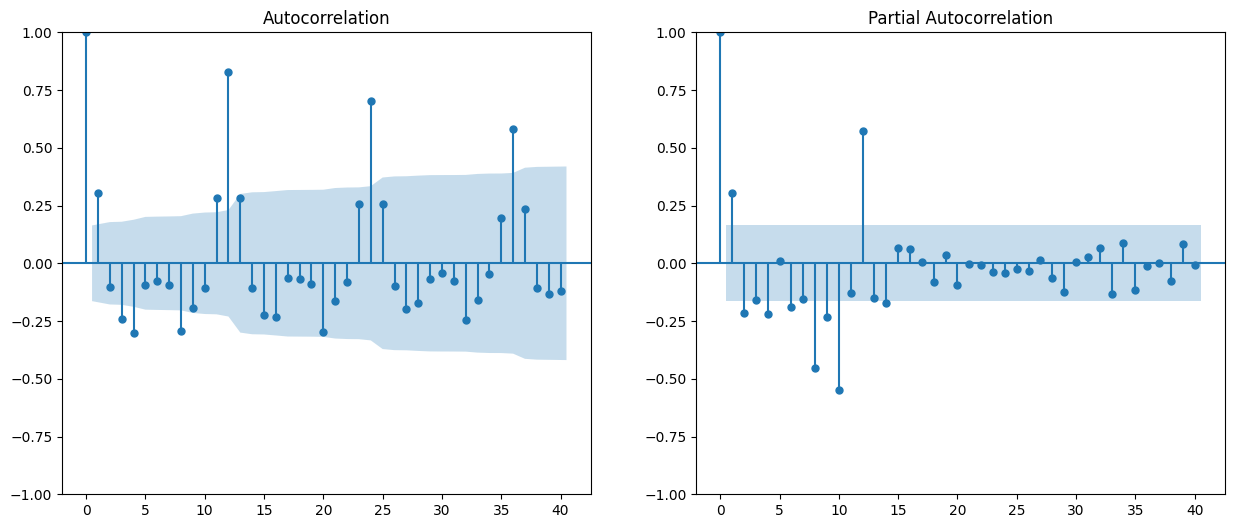

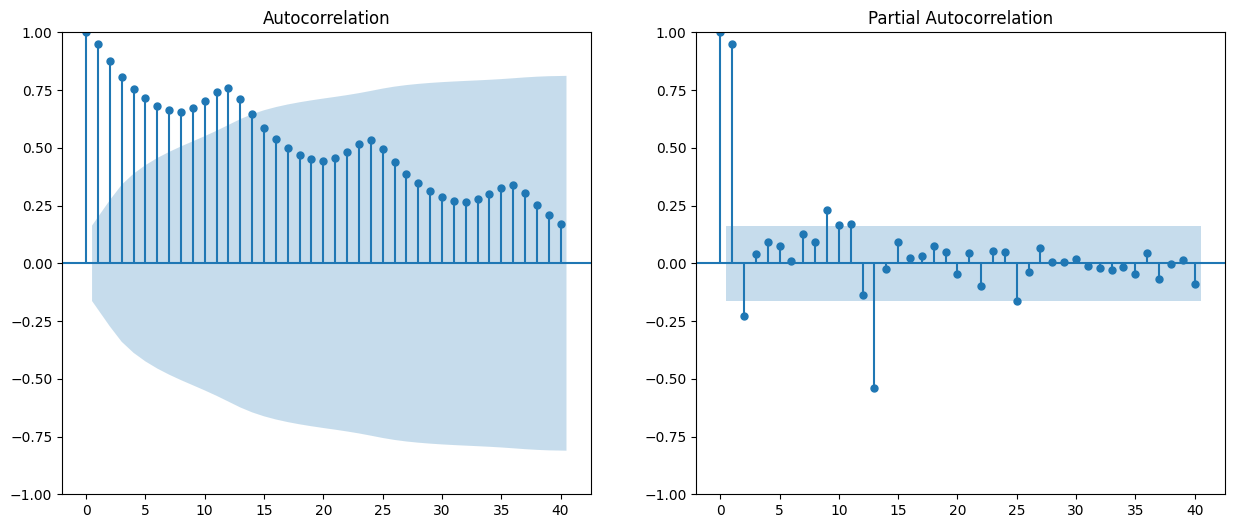

In [59]:
dfoutput_diff = pd.Series(dftest_diff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest_diff[4].items():
    dfoutput_diff['Critical Value (%s)' % key] = value

    print(dfoutput_diff)

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    plot_acf(data_diff, lags=40, ax=axes[0])
    plot_pacf(data_diff, lags=40, ax=axes[1])
    plt.show()
    d = 1  # degree of differencing
    
else:
    # Plot ACF and PACF for original data
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    plot_acf(data, lags=40, ax=axes[0])
    plot_pacf(data, lags=40, ax=axes[1])
    plt.show()
    
    d = 0  # no differencing needed

In [60]:
forecast_steps = 24  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

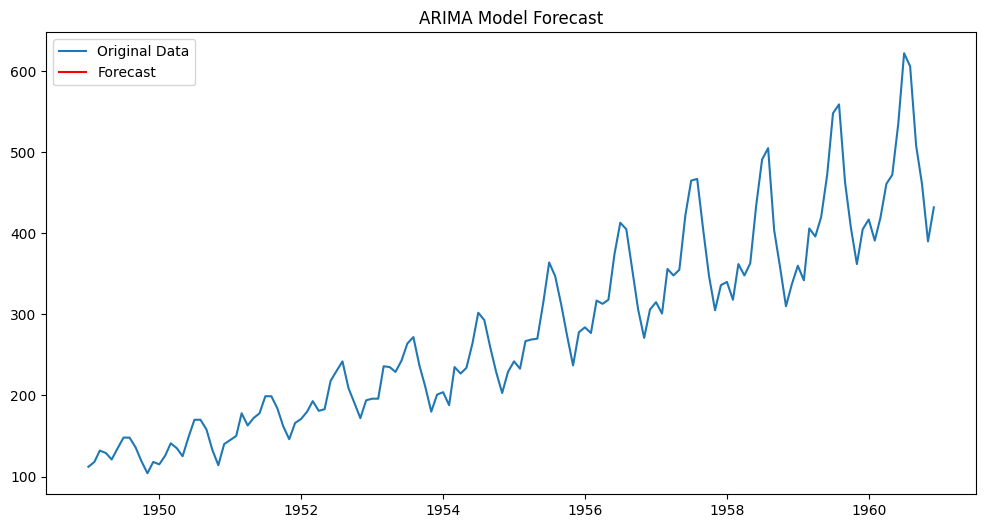

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()